In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [ ]:
isosyote_url = "https://raw.githubusercontent.com/Mini-project-Team-Theta/team_theta/refs/heads/main/final/isosyote_df.csv"

df

,Observation station,Year,Month,Day,Snow depth [cm],Date,Average temperature [Â°C],cloud_code,Global radiation mean [W/m2]
0,Taivalkoski parish,2004,1,1,29.0,2004-01-01,-30.5,NaN,"0,2"
1,Taivalkoski parish,2004,1,2,29.0,2004-01-02,-13.7,NaN,"-0,2"
2,Taivalkoski parish,2004,1,3,29.0,2004-01-03,-10.7,NaN,"0,3"
3,Taivalkoski parish,2004,1,4,29.0,2004-01-04,-12.7,NaN,"-0,4"
4,Taivalkoski parish,2004,1,5,30.0,2004-01-05,-14.6,NaN,-1
...,...,...,...,...,...,...,...,...,...
7599,Taivalkoski parish,2024,11,27,6.0,2024-11-27,-7.0,8.0,"1,4"
7600,Taivalkoski parish,2024,11,28,6.0,2024-11-28,-4.4,3.0,"0,9"
7601,Taivalkoski parish,2024,11,29,6.0,2024-11-29,-2.4,8.0,"-0,5"
7602,Taivalkoski parish,2024,11,30,6.0,2024-11-30,-10.6,0.0,"-0,1"


In [14]:
df.drop(columns=["Observation station"], inplace=True)
df

,Year,Month,Day,Snow depth [cm],Date,Average temperature [Â°C],cloud_code,Global radiation mean [W/m2]
0,2004,1,1,29.0,2004-01-01,-30.5,NaN,"0,2"
1,2004,1,2,29.0,2004-01-02,-13.7,NaN,"-0,2"
2,2004,1,3,29.0,2004-01-03,-10.7,NaN,"0,3"
3,2004,1,4,29.0,2004-01-04,-12.7,NaN,"-0,4"
4,2004,1,5,30.0,2004-01-05,-14.6,NaN,-1
...,...,...,...,...,...,...,...,...
7599,2024,11,27,6.0,2024-11-27,-7.0,8.0,"1,4"
7600,2024,11,28,6.0,2024-11-28,-4.4,3.0,"0,9"
7601,2024,11,29,6.0,2024-11-29,-2.4,8.0,"-0,5"
7602,2024,11,30,6.0,2024-11-30,-10.6,0.0,"-0,1"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7604 entries, 0 to 7603
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          7604 non-null   int64  
 1   Month                         7604 non-null   int64  
 2   Day                           7604 non-null   int64  
 3   Snow depth [cm]               7597 non-null   float64
 4   Date                          7604 non-null   object 
 5   Average temperature [Â°C]     7604 non-null   float64
 6   cloud_code                    6760 non-null   float64
 7   Global radiation mean [W/m2]  7547 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 475.4+ KB


In [16]:
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].str.replace(",", ".").astype(float)

In [17]:
#df["Snow depth [cm]"] = df["Snow depth [cm]"].interpolate()
df["Average temperature [Â°C]"] = df["Average temperature [Â°C]"].interpolate()
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].interpolate()
df["cloud_code"] = df["cloud_code"].interpolate()

Text(0.5, 1.0, 'Correlation Matrix')

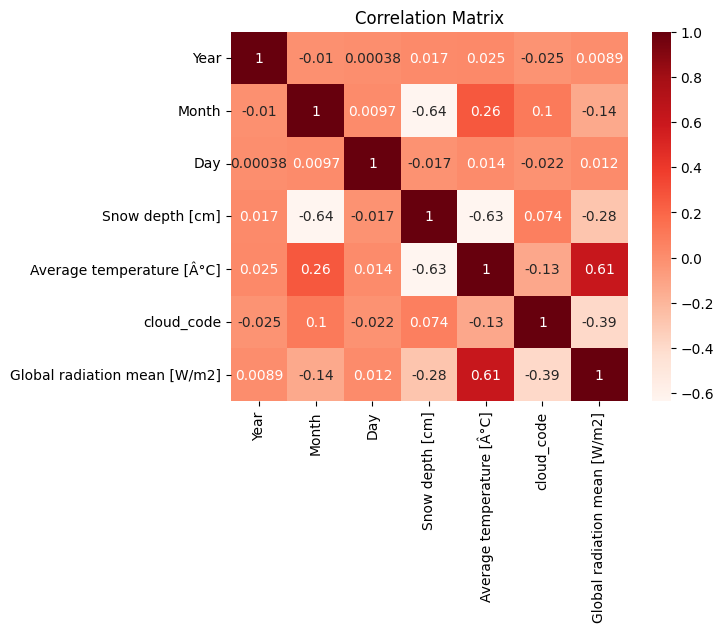

In [18]:
sns.heatmap(df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [20]:
print(df.dtypes)

Year                              int64
Month                             int64
Day                               int64
Snow depth [cm]                 float64
Date                             object
Average temperature [Â°C]       float64
cloud_code                      float64
Global radiation mean [W/m2]    float64
dtype: object


In [ ]:
df["day_of_year"] = df["Date"].dt.dayofyear

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
X = df[["Average temperature [Â°C]", "Global radiation mean [W/m2]", "Year", "Month", "Day"]]
y = df["Snow depth [cm]"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 318.51323216344696


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")

R2: 0.6451172878750244


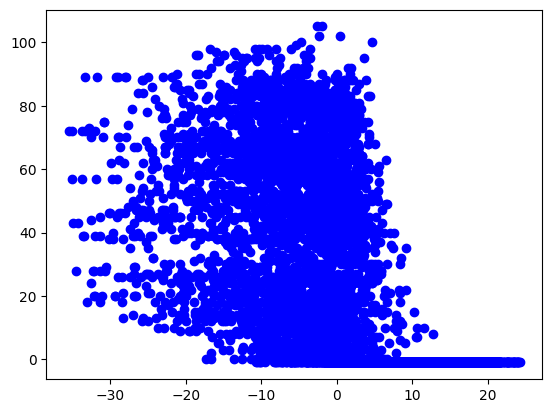

In [ ]:
plt.scatter(X["Average temperature [Â°C]"], y, color='blue')
plt.show()

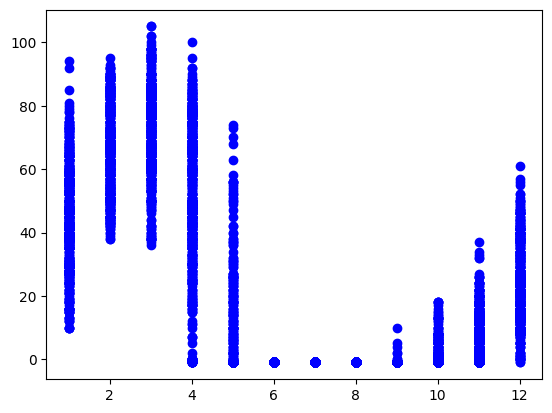

In [ ]:
plt.scatter(X["Month"], y, color='blue')
plt.show()

In [ ]:
# 🔹 Create Polynomial Features (Degree 2 or 3 for Curved Trends)
degree = 2  # Try changing to 3 or 4 for more complexity
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(years)  # Transform input to polynomial features

# 🔹 Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, values)

# 🔹 Create Future Years (Next 10 Years)
future_years = np.array(range(2025, 2035)).reshape(-1, 1)  # Predict 2025-2034
future_years_poly = poly.transform(future_years)  # Apply same transformation

# 🔹 Predict Future Values
future_predictions = model.predict(future_years_poly)

# 🔹 Visualize Results
plt.scatter(years, values, color="blue", label="Actual Data")
plt.plot(future_years, future_predictions, color="red", linestyle="dashed", label="Polynomial Predictions")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title(f"Polynomial Regression Forecast (Degree {degree}) for Next 10 Years")
plt.legend()
plt.show()

# 🔹 Print Predictions
future_df = pd.DataFrame({"Year": future_years.flatten(), "Predicted Value": future_predictions})
print(future_df)

In [ ]:
plt.scatter(kittila_df("Year"), y, color="blue")
plt.plot(future_years, future, color="red")
plt.legend()
plt.show()